In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df = pd.read_csv("garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


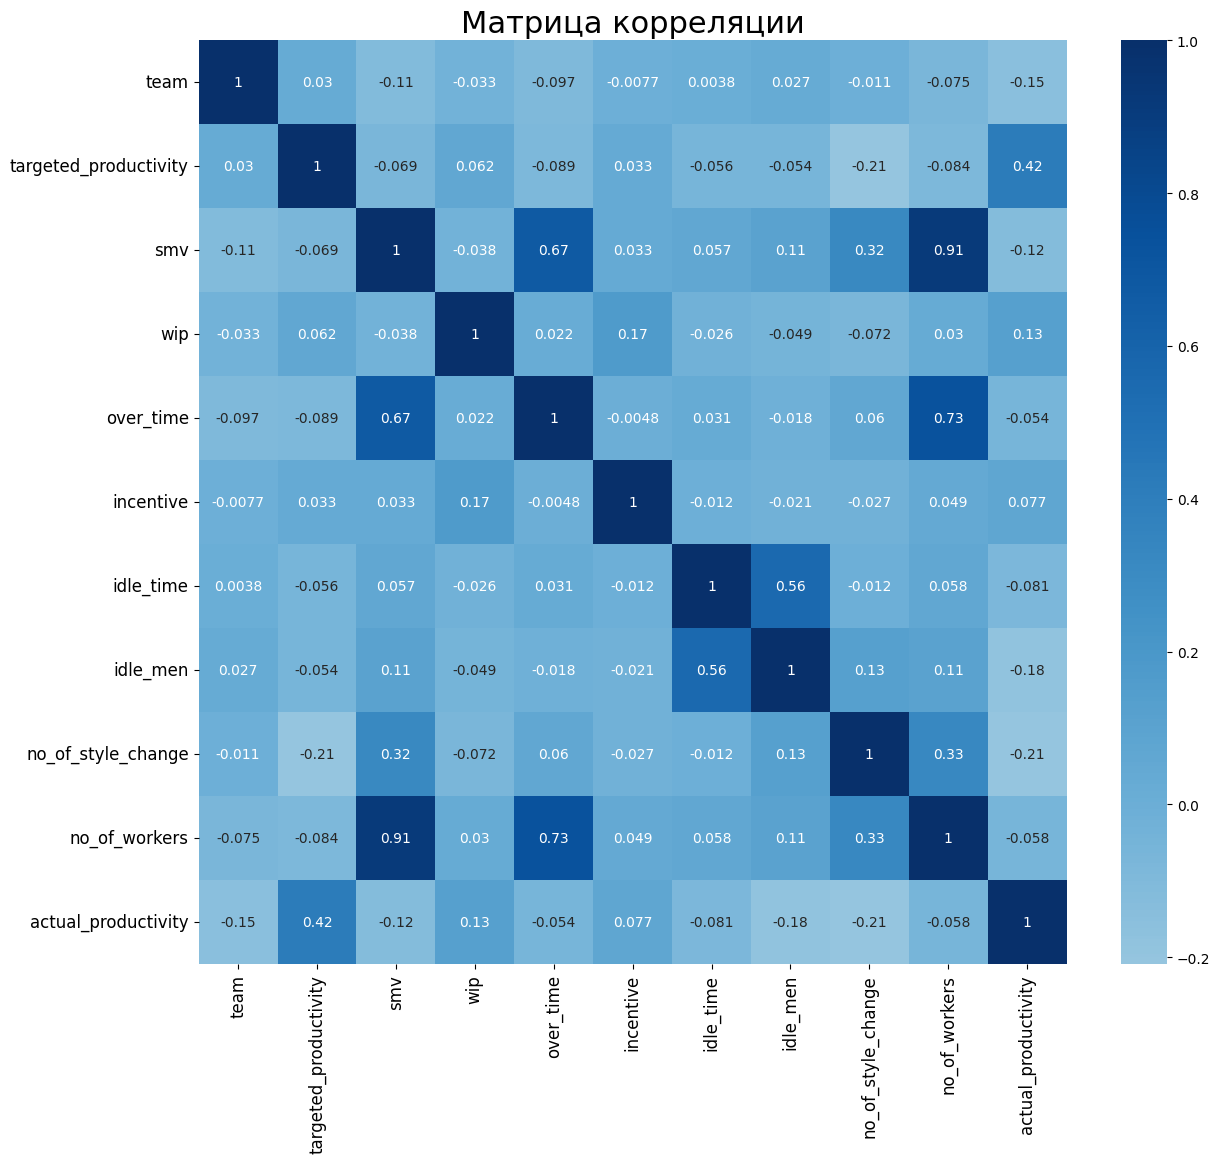

In [25]:
plt.figure(figsize=(14,12))
a = df.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

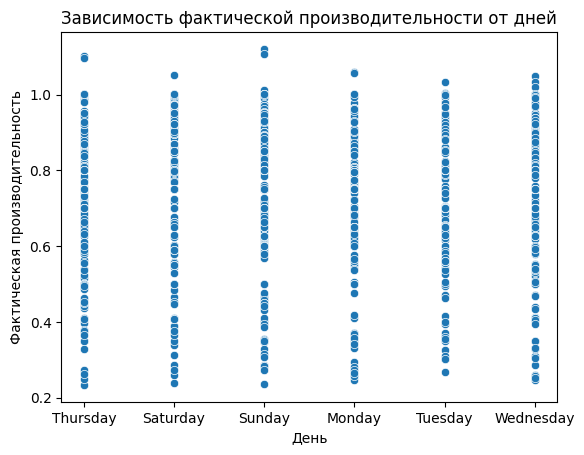

In [26]:
sns.scatterplot(data=df, x="day", y="actual_productivity")
plt.xlabel("День")
plt.ylabel("Фактическая производительность")
plt.title("Зависимость фактической производительности от дней")
plt.show()

In [27]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [28]:
df["wip"].fillna(df["wip"].mean(), inplace=True)
df.isna().sum()

<ipython-input-28-1ea151d19454>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["wip"].fillna(df["wip"].mean(), inplace=True)


,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


Mean Absolute Error: 0.10995723399025627
Mean Squared Error: 0.022392652784569447
R2 score: 0.15666392933215734


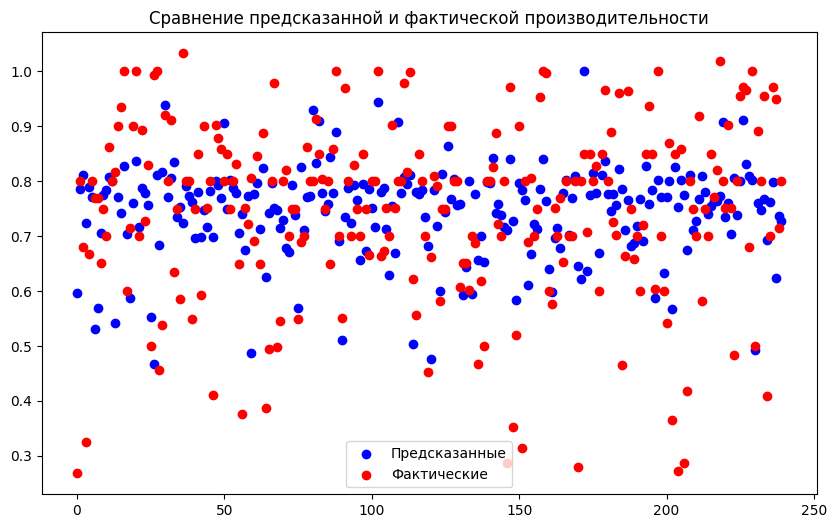

In [31]:
features = ["quarter", "day", "targeted_productivity", "smv", "wip", "over_time",
            "incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]
target = "actual_productivity"

X = df[features]
y = df[target]

# Преобразование категориальных переменных в числовые
X = pd.get_dummies(X)

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
std = StandardScaler()
X_std = std.fit_transform(X_train)
X_std2 = std.transform(X_test)

# Преобразование в DataFrame
X_std = pd.DataFrame(X_std, columns=X_train.columns)
X_std2 = pd.DataFrame(X_std2, columns=X_test.columns)

# Обучение модели линейной регрессии
lig_reg2 = LinearRegression()
lig_reg2.fit(X_std, y_train)

# Прогнозирование
y_pred2 = lig_reg2.predict(X_std2)

# Оценка модели
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))
print('R2 score:', r2_score(y_test, y_pred2))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred2)), y_pred2, label='Предсказанные', color='blue')
plt.scatter(range(len(y_test)), y_test, label='Фактические', color='red')
plt.title('Сравнение предсказанной и фактической производительности')
plt.legend()
plt.show()
